In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
import tensorflow as tf
print("hi")

hi


In [18]:
X_train = np.load(r'C:\Users\Manthan\Desktop\jupyter_extension_prettier\vs_code_extension\train_gesture.npy')
y_train = np.load(r'C:\Users\Manthan\Desktop\jupyter_extension_prettier\vs_code_extension\train_gesture_labels.npy')
X_test = np.load(r'C:\Users\Manthan\Desktop\jupyter_extension_prettier\vs_code_extension\validation_gesture.npy')
y_test = np.load(r'C:\Users\Manthan\Desktop\jupyter_extension_prettier\vs_code_extension\validation_gesture_labels.npy')

In [19]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

print(np.unique(y_train))

(18465, 48, 48)
(18465,)
(4600, 48, 48)
(4600,)
[0 1 2 3]


In [20]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(14772, 48, 48)
(14772,)
(3693, 48, 48)
(3693,)


In [23]:
# create cnn
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation="relu", input_shape=(48,48,1)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dense(4,activation="sigmoid")
])

model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │         819,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 838,660 (3.20 MB)

 Trainable params: 838,660 (3.20 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_val,y_val))

Epoch 1/10
462/462 ━━━━━━━━━━━━━━━━━━━━ 27s 54ms/step - accuracy: 0.3888 - loss: 7.2757 - val_accuracy: 0.5026 - val_loss: 1.1528
Epoch 2/10
462/462 ━━━━━━━━━━━━━━━━━━━━ 40s 52ms/step - accuracy: 0.5433 - loss: 1.0766 - val_accuracy: 0.5280 - val_loss: 1.1105
Epoch 3/10
462/462 ━━━━━━━━━━━━━━━━━━━━ 25s 54ms/step - accuracy: 0.6161 - loss: 0.9224 - val_accuracy: 0.5716 - val_loss: 1.0280
Epoch 4/10
462/462 ━━━━━━━━━━━━━━━━━━━━ 42s 55ms/step - accuracy: 0.6903 - loss: 0.7737 - val_accuracy: 0.5722 - val_loss: 1.0560
Epoch 5/10
462/462 ━━━━━━━━━━━━━━━━━━━━ 42s 56ms/step - accuracy: 0.7510 - loss: 0.6372 - val_accuracy: 0.5797 - val_loss: 1.1179
Epoch 6/10
462/462 ━━━━━━━━━━━━━━━━━━━━ 26s 57ms/step - accuracy: 0.8184 - loss: 0.4877 - val_accuracy: 0.6011 - val_loss: 1.2260
Epoch 7/10
462/462 ━━━━━━━━━━━━━━━━━━━━ 27s 57ms/step - accuracy: 0.8601 - loss: 0.3845 - val_accuracy: 0.6071 - val_loss: 1.4060
Epoch 8/10
462/462 ━━━━━━━━━━━━━━━━━━━━ 40s 56ms/step - accuracy: 0.9044 - loss: 0.2697 - 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


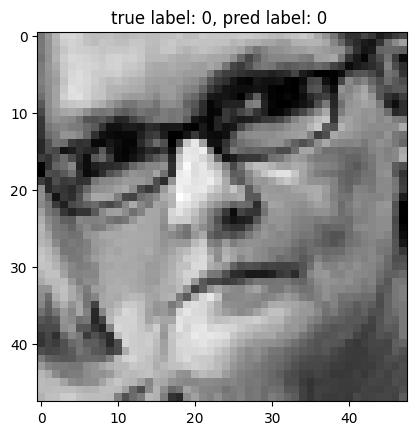

In [32]:
import matplotlib.pyplot as plt
def visualise_results(index):
    test_img = X_test[index].reshape(48,48,1)
    true = y_test[index]
    pred = np.argmax(model.predict(X_test[index:index+1]))
    plt.imshow(test_img, cmap="gray")
    plt.title(f"true label: {true}, pred label: {pred} ")
    plt.show()

visualise_results(56)